# Learning Objectives

Towards the end of this lesson, you should be able to:
- write Python codes for association rule mining
- experimenting with laundry dataset and linear regression


## Import the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', 500)

# Association Rule Mining

### Importing the Dataset

In [2]:
# load store_data.csv dataset

store_data = pd.read_csv('store_data.csv', header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists, execute the following script:

In [3]:
# transform the original dataset into ARM friendly format

records = []

for i in range(0,7501):
    records.append([str(store_data.values[i,j]) for j in range (0,20)])
    # we used 20 bec we have 20 columns
    # association rules (e-commerce platform) -> unsupervised
    # dont teach computers to recognize the pattern; the computer recognize the patterns itself

In [4]:
records

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

### Applying Apriori Algorithm

You must set the parameters in the apriori algorithm. <br>


In [5]:
# run apriori function
# the higher the lift, the more interesting it is

association_rules = apriori(records, min_support = 0.0045,
                            min_confidence=0.2,
                            min_lift=3,
                            min_length=2)
association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

### Check the output

In [6]:
len(association_results)

48

In [7]:
print(association_results[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


### Output in better presentation

In [8]:
cnt =0

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) chicken -> light cream
Support: 0.005
Confidence: 0.2906
Lift: 4.844
(Rule 2) escalope -> mushroom cream sauce
Support: 0.006
Confidence: 0.3007
Lift: 3.7908
(Rule 3) escalope -> pasta
Support: 0.006
Confidence: 0.3729
Lift: 4.7008
(Rule 4) herb & pepper -> ground beef
Support: 0.016
Confidence: 0.3235
Lift: 3.292
(Rule 5) ground beef -> tomato sauce
Support: 0.005
Confidence: 0.3774
Lift: 3.8407
(Rule 6) whole wheat pasta -> olive oil
Support: 0.008
Confidence: 0.2715
Lift: 4.1224
(Rule 7) shrimp -> pasta
Support: 0.005
Confidence: 0.322
Lift: 4.5067
(Rule 8) chicken -> nan
Support: 0.005
Confidence: 0.2906
Lift: 4.844
(Rule 9) chocolate -> frozen vegetables
Support: 0.005
Confidence: 0.2326
Lift: 3.2545
(Rule 10) cooking oil -> ground beef
Support: 0.005
Confidence: 0.5714
Lift: 3.282
(Rule 11) escalope -> nan
Support: 0.006
Confidence: 0.3007
Lift: 3.7908
(Rule 12) escalope -> nan
Support: 0.006
Confidence: 0.3729
Lift: 4.7008
(Rule 13) frozen vegetables -> ground beef
Supp

# Linear Regression

In [9]:
df_all = pd.DataFrame()
for i in range(4):
    filename = './data/file' + str(i+1) + ".xlsx"
    df = pd.read_excel(filename, sheet_name='Reading', skiprows = 2, usecols = 'G:AB') 
    df.drop(df.index[31:], inplace=True)
    df_all = df_all.append(df) 
df_all = df_all.fillna(0)
df_all = df_all/56*5 # this is just a data transformation to Ringgit Malaysia
df_all = df_all.round(2)
df_all.head()

,Detergent 1,Detergent 2,Detergent 3,Detergent 4,Softener 1,Softener 2,Bleach 1,Bleach 2,Aroma 1,Aroma 2,Bag 1,Bag 2,W1,W2,W3,W4,W5,W6,D7,D8,D9,D10
0,1.70,1.70,1.52,1.61,1.07,1.07,2.23,2.23,1.96,1.96,1.70,1.79,18.12,33.39,67.77,49.02,41.52,33.84,56.16,30.36,25.80,46.07
1,1.61,1.52,1.25,1.25,0.89,0.89,2.14,2.14,1.88,1.96,1.61,1.70,6.07,7.14,37.95,42.59,24.82,38.04,28.30,4.55,19.73,23.30
2,1.61,1.52,1.07,1.16,0.89,0.89,2.05,2.05,1.88,1.96,1.52,1.61,10.18,20.27,39.55,28.39,19.73,35.89,4.55,13.66,18.75,14.73
3,1.61,1.52,1.07,1.16,0.80,0.80,1.88,1.96,1.79,1.88,1.52,1.52,7.14,21.25,19.73,48.12,35.98,36.52,22.77,19.20,18.21,23.75
4,2.32,2.23,1.70,1.61,1.43,1.52,1.79,1.88,1.70,1.70,1.34,1.34,12.68,38.93,38.48,46.07,33.93,58.75,36.43,25.27,24.38,41.52


In [10]:
len(df_all)

122

In [11]:
# Transform the dataset format
# melting = the table from wide to long

df_all_melt = df_all.melt()
df_all_melt.columns = ['Item', 'Sales']
a=df_all_melt.loc[df_all_melt['Item']=='Detergent 1','Sales']
df_all_melt['Sales'].sum()

62845.22

In [12]:
df_all_melt

,Item,Sales
0,Detergent 1,1.70
1,Detergent 1,1.61
2,Detergent 1,1.61
3,Detergent 1,1.61
4,Detergent 1,2.32
...,...,...
2679,D10,60.09
2680,D10,62.68
2681,D10,56.52
2682,D10,20.27


Text(0.5, 0, 'Items')

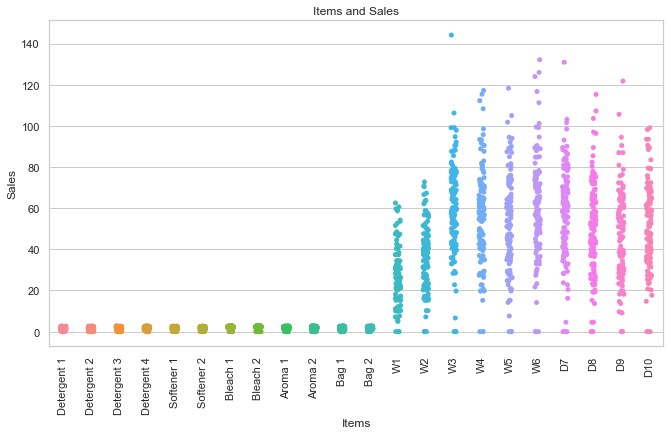

In [13]:
sns.set(rc={'figure.figsize':(11,6)})
sns.set(style="whitegrid", color_codes=True)

a = sns.stripplot(x="Item", y="Sales", data=df_all_melt)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_title('Items and Sales')
a.set_ylabel('Sales')
a.set_xlabel('Items')


Text(0.5, 0, 'Items')

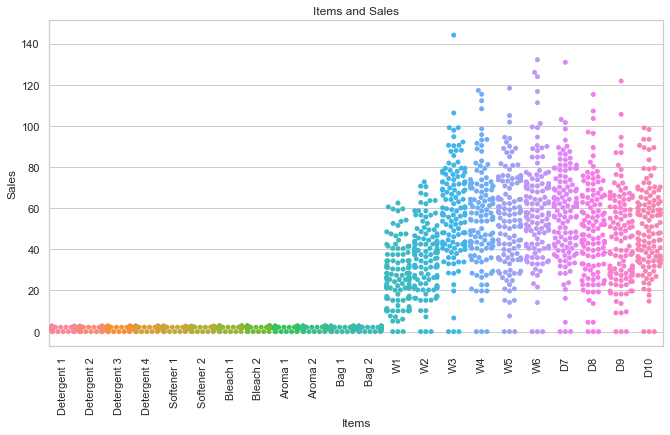

In [15]:
# Plot swarmplot

sns.set(rc={'figure.figsize':(11, 6)})
sns.set(style="whitegrid", color_codes=True)

a = sns.swarmplot(x="Item", y="Sales", data=df_all_melt)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_title("Items and Sales")
a.set_ylabel("Sales")
a.set_xlabel("Items")

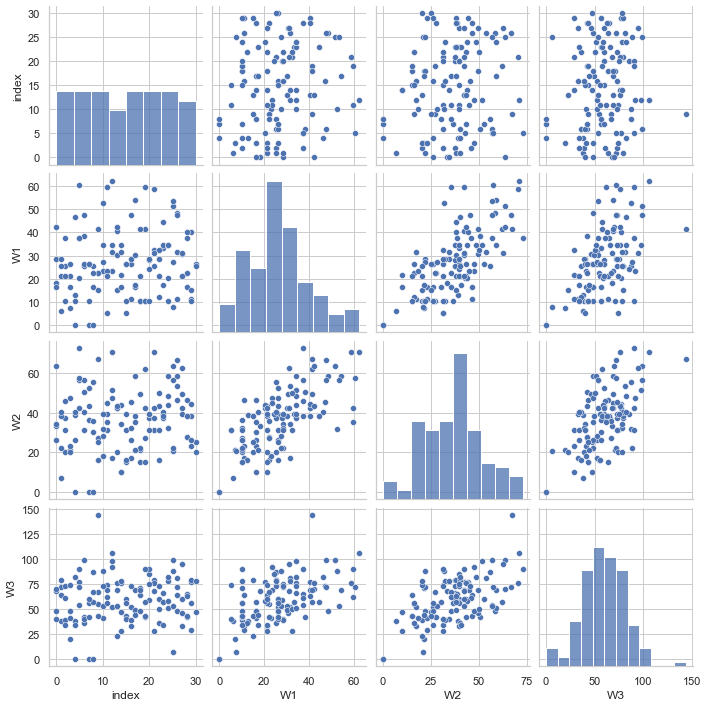

In [16]:
# plot pairplot

df_w123 = df_all[['W1','W2','W3']].reset_index()

sns.pairplot(df_w123)

<AxesSubplot:>

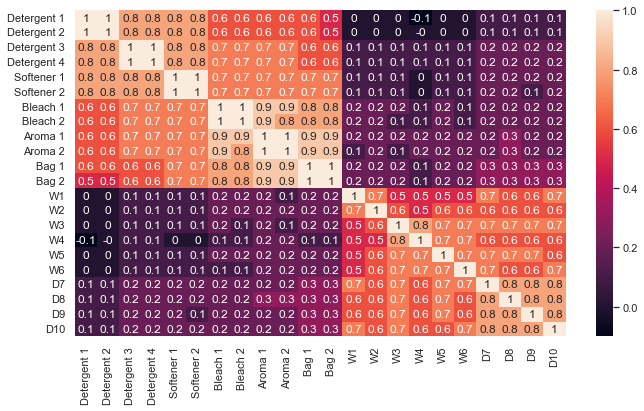

In [17]:
# plot heatmap to show the correlation
# 1 is the best; it has the strongest correlation
# 0 is no relation
# negative means the opposite side of it

sns.set(rc={'figure.figsize':(11,6)})
correlation_matrix = df_all.iloc[:,:].corr().round(1)

sns.heatmap(data=correlation_matrix, annot=True)

In [18]:
# Perform grouping for Item-Sales

df_itemSales = df_all_melt.groupby(["Item"]).sum() 
df_itemSales.reset_index(inplace=True)
df_itemSales.head()

,Item,Sales
0,Aroma 1,227.60
1,Aroma 2,229.58
2,Bag 1,212.99
3,Bag 2,212.20
4,Bleach 1,267.92


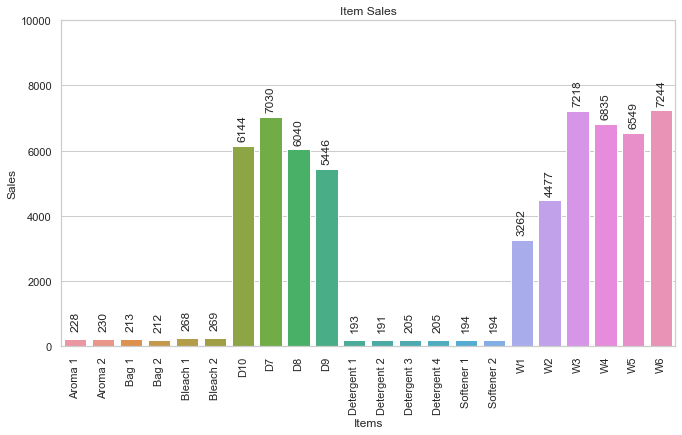

In [19]:
# Plot Item-Sales barchart

sns.set(rc={'figure.figsize':(11,6)})
sns.set(style="whitegrid", color_codes=True)

b = sns.barplot(x="Item", y="Sales",  data=df_itemSales)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title('Item Sales')
b.set_ylabel('Sales')
b.set_xlabel('Items')
b.set(ylim=(0, 10000))

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + 
	p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', rotation=90, 
	xytext=(0, 18), textcoords='offset points')



In [20]:
# Getting the daily sales

df_dailySales = df_all.groupby(df_all.index).sum() 
df_dailySales.reset_index(drop=True, inplace=True) 
df_dailySales = df_dailySales.sum(axis=1).to_frame() 
df_dailySales.columns = ['Sales'] 


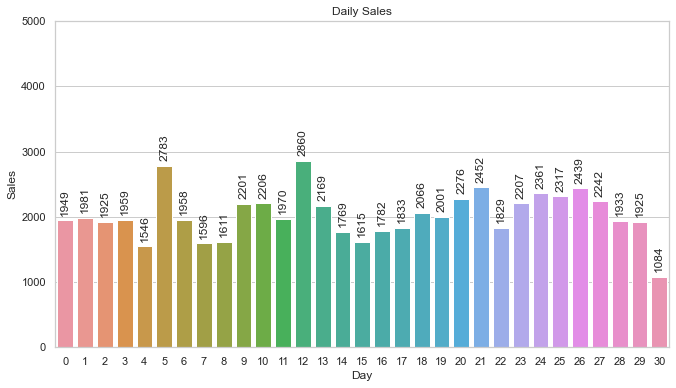

In [21]:
# Plot daily sales

sns.set(rc={'figure.figsize':(11, 6)})
sns.set(style="whitegrid", color_codes=True)

b = sns.barplot(x=df_dailySales.index, y="Sales",  data=df_dailySales)
b.set_xticklabels(b.get_xticklabels(), rotation=0)
b.set_title('Daily Sales')
b.set_ylabel('Sales')
b.set_xlabel('Day')

b.set(ylim=(0, 5000))

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + 
	p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', rotation=90, 
	xytext=(0, 18), textcoords='offset points')


<AxesSubplot:xlabel='VM_Sum', ylabel='Density'>

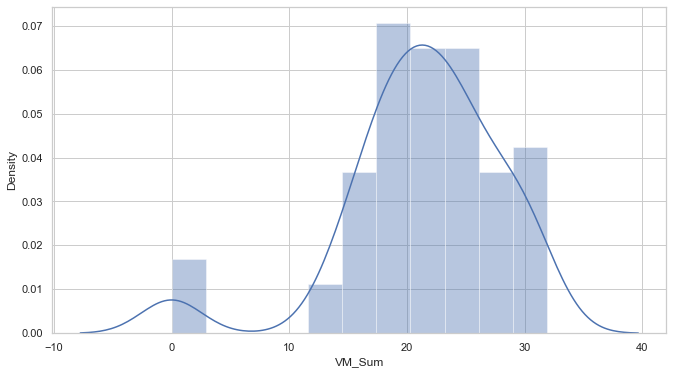

In [22]:
# Get the distribution plot for VM_Sum

df_all['VM_Sum'] = df_all.loc[:, 'Detergent 1':'Bag 2'].sum(axis=1)
sns.distplot(df_all['VM_Sum'])


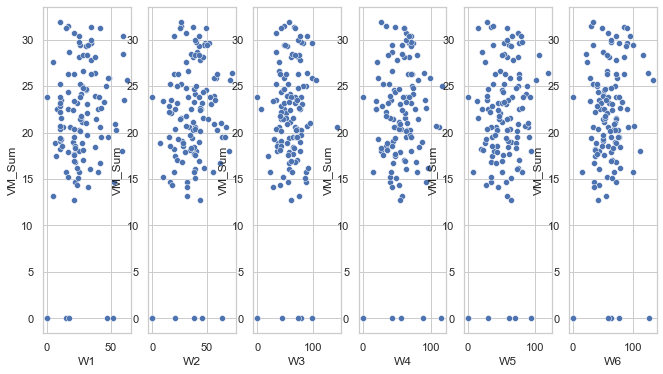

In [23]:
# Plot Scatterplot for 5 washers

features = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6']
target = df_all['VM_Sum']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_all[col]
    y = target
    sns.scatterplot(x,y)


# LR using statemodels 

In [24]:
# Prepare dataset for Linear Regression for W3 agains VM_Sum

import statsmodels.api as sm

X = df_all[['W3']]
Y = df_all[['VM_Sum']]


In [27]:
# Using OLS

model = sm.OLS(Y, X).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 VM_Sum   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              543.0
Date:                Mon, 17 Oct 2022   Prob (F-statistic):                    1.48e-46
Time:                        21:16:54   Log-Likelihood:                         -448.33
No. Observations:                 122   AIC:                                      898.7
Df Residuals:                     121   BIC:                                      901.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W3             0.3195      0.014     23.302      0.000       0.292       0.347
==============================================================================
Omnibus:                       19.735   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.245
Skew:                          -0.819   Prob(JB):                     7.36e-07
Kurtosis:                       4.695   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

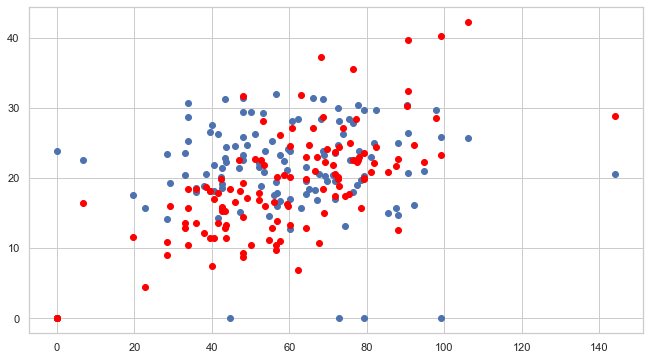

In [29]:
plt.scatter(X['W3'],Y)
plt.scatter(X['W3'],predictions, color='red')


In [30]:
# Retrieve the model summary

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VM_Sum   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.744
Date:                Mon, 17 Oct 2022   Prob (F-statistic):              0.189
Time:                        21:18:39   Log-Likelihood:                -404.81
No. Observations:                 122   AIC:                             813.6
Df Residuals:                     120   BIC:                             819.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1998      1.718     11.178      0.000      15.799      22.601
W3             0.0358      0.027      1.321      0.189      -0.018       0.090
==============================================================================
Omnibus:                       35.199   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.307
Skew:                          -1.258   Prob(JB):                     6.59e-15
Kurtosis:                       5.553   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

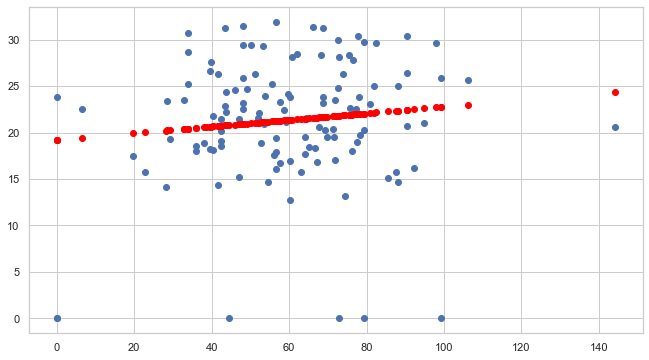

In [31]:
plt.scatter(X['W3'],Y)
plt.scatter(X['W3'],predictions, color='red')


# LR using sklearn

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


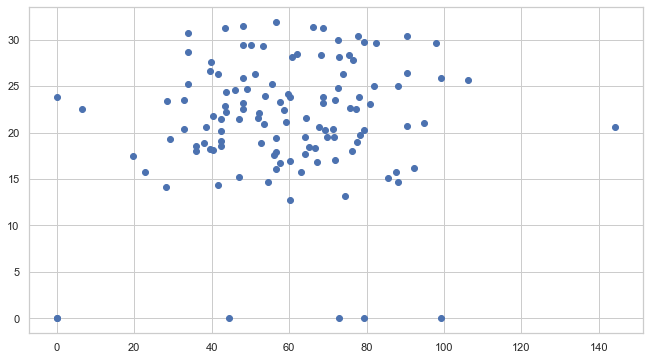

In [33]:
X = df_all.loc[:,'W3'] 
Y = df_all.loc[:,'VM_Sum'] 

plt.plot(X,Y, linestyle='',marker='o')

In [34]:
X = df_all.loc[:,['W3']] 
Y = df_all.loc[:,'VM_Sum'] 

# test: 20%, training: 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(97, 1)
(97,)
(25, 1)
(25,)


In [35]:
# Linear Regression model construction

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [36]:
# Get the coefficient

lm.coef_ 

array([0.04808985])

In [37]:
# Get the intercept

lm.intercept_

18.68643098559379

In [39]:
# perform prediction on X_test

Y_test_pred = lm.predict(X_test)
Y_test_pred = pd.DataFrame(Y_test_pred, columns = ['PredictedSum'])

In [40]:
# Construct a table to compare VM_Sum and PredictedSum

df_tmp = df_all.loc[:,['W3','VM_Sum']]
df_new = pd.concat([df_tmp.reset_index(drop=True), Y_test_pred], axis=1) 
df_new.head()


,W3,VM_Sum,PredictedSum
0,67.77,20.54,20.901930
1,37.95,18.84,22.400410
2,39.55,18.21,22.503803
3,19.73,17.51,22.181601
4,38.48,20.56,20.996667


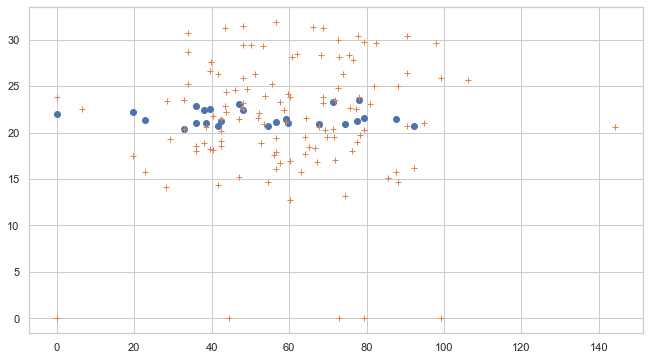

In [41]:
# Plot a scatterplot to compare W3 and PredictedSum and VM_Sum

plt.plot( 'W3', 'PredictedSum', data=df_new, linestyle='', marker='o')  
plt.plot( 'W3', 'VM_Sum', data=df_new, linestyle='', marker='+') 


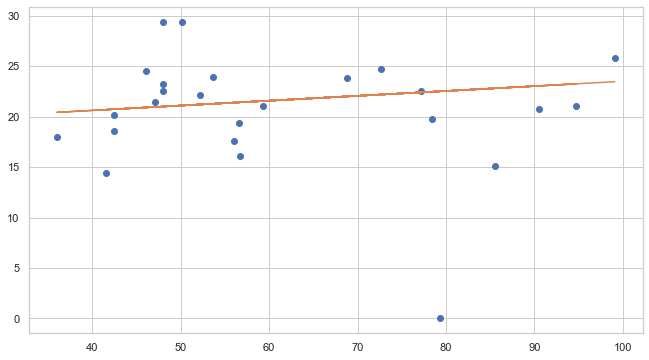

In [42]:
# Plot X_test agains Y_test and Y_test_pred

X_test = X_test.loc[:,'W3']
Y_test_pred = Y_test_pred.squeeze()

plt.plot(X_test, Y_test, 'o')
plt.plot(X_test, Y_test_pred)
plt.show()

In [43]:
lm.coef_ 

array([0.04808985])

In [44]:
lm.intercept_

18.68643098559379

In [45]:
# Get the model to predict Y_test value when X_test = 60

lm.predict([[60]])

array([21.57182179])